In [44]:
data <- read.csv2("C:/Trees/Response.csv")

In [45]:
data$mortgage <-as.factor(data$mortgage)
data$life_ins <-as.factor(data$life_ins)
data$cre_card <-as.factor(data$cre_card)
data$deb_card <-as.factor(data$deb_card)
data$mob_bank <-as.factor(data$mob_bank)
data$curr_acc <-as.factor(data$curr_acc)
data$internet <-as.factor(data$internet)
data$perloan <-as.factor(data$perloan)
data$savings <-as.factor(data$savings)
data$atm_user <-as.factor(data$atm_user)
data$markpl <-as.factor(data$markpl)
data$response <-as.factor(data$response)

In [46]:
set.seed(42)
data$random_number <- runif(nrow(data),0,1)
development <- data[which(data$random_number > 0.3), ]
holdout <- data[ which(data$random_number <= 0.3), ]
development$random_number <- NULL
holdout$random_number <- NULL
str(development)
str(holdout)

'data.frame':	21154 obs. of  14 variables:
 $ mortgage: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 2 2 2 2 ...
 $ life_ins: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 2 2 2 2 ...
 $ cre_card: Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 2 1 1 ...
 $ deb_card: Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 2 2 2 ...
 $ mob_bank: Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 1 ...
 $ curr_acc: Factor w/ 2 levels "0","1": 1 1 2 1 2 1 1 2 1 1 ...
 $ internet: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ perloan : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 1 1 ...
 $ savings : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ atm_user: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1 ...
 $ markpl  : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 2 1 1 1 ...
 $ age     : int  18 18 18 18 18 18 18 18 18 18 ...
 $ cus_leng: int  1 2 2 2 2 1 3 2 1 2 ...
 $ response: Factor w/ 2 levels "0","1": 1 2 2 1 2 2 1 2 2 2 ...
'data.frame':	9105 obs. of  14 variables:
 $ mortgage: Factor w/ 2 levels "0","1": 

In [47]:
library(randomForest)

In [48]:
set.seed(152)
model<-randomForest(response ~., development, importance=TRUE)
print(model)


Call:
 randomForest(formula = response ~ ., data = development, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.9%
Confusion matrix:
      0    1 class.error
0 10205 1807   0.1504329
1  1979 7163   0.2164734


In [49]:
table(development$response, predict(model))

   
        0     1
  0 10205  1807
  1  1979  7163

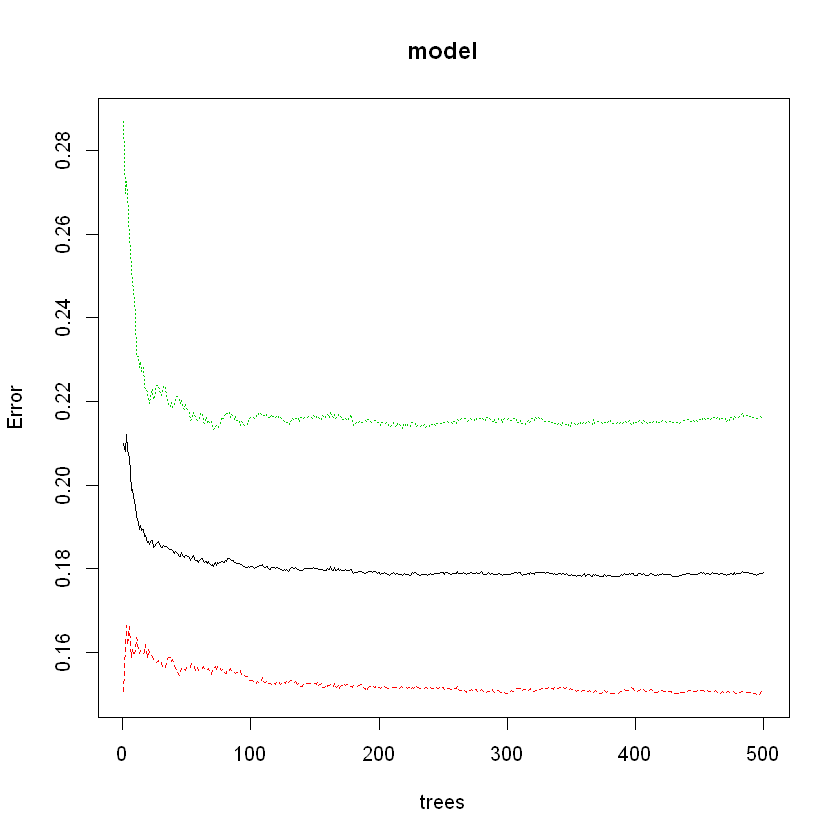

In [50]:
plot(model)

-0.01553858 0.05 
-0.0524098 0.05 


,mtry,OOBError
2.OOB,2,0.1822823
3.OOB,3,0.1794932
6.OOB,6,0.1889004


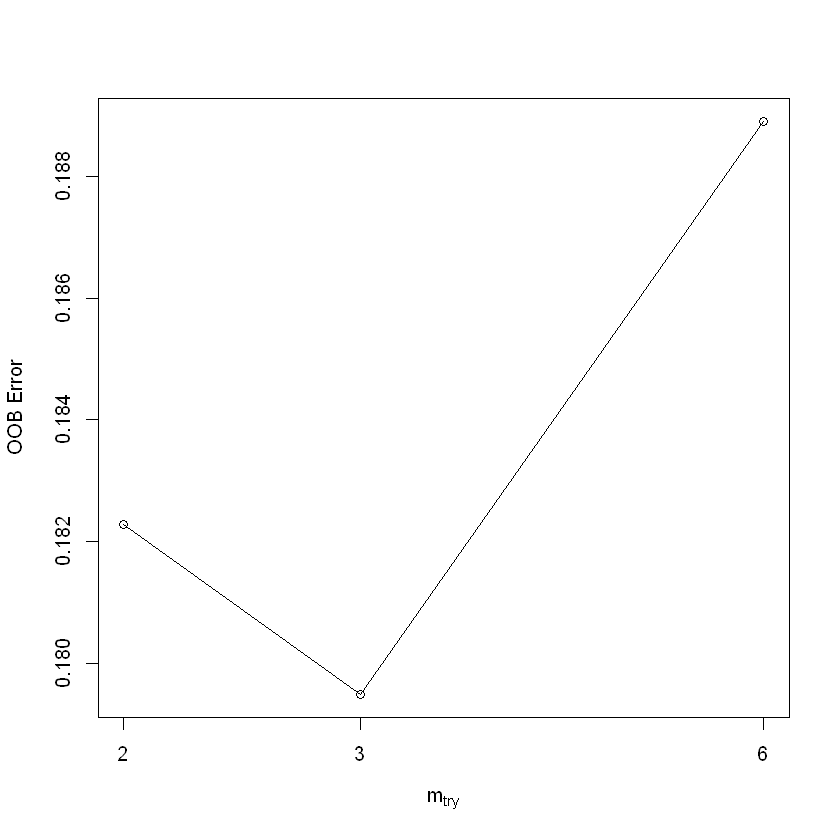

In [51]:
set.seed(152)
tuneRF(development[,1:13], development[,14], ntreeTry=500, trace=FALSE)

In [52]:
importance(model)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
mortgage,24.617204206,-2.500776,24.001405,117.04399
life_ins,19.757225517,2.748487,23.308543,97.15749
cre_card,33.941396685,28.623893,46.825814,459.41408
deb_card,5.193765254,8.158659,10.635994,63.48066
mob_bank,35.287746430,15.943149,38.418814,143.44418
curr_acc,38.270624615,17.627133,46.052467,282.88614
internet,-1.083234424,30.406735,28.994728,60.70255
perloan,-1.730117992,6.174774,3.299139,52.97052
savings,0.001114391,26.678706,29.229889,67.80267
atm_user,43.577559721,85.786279,86.132606,898.75617


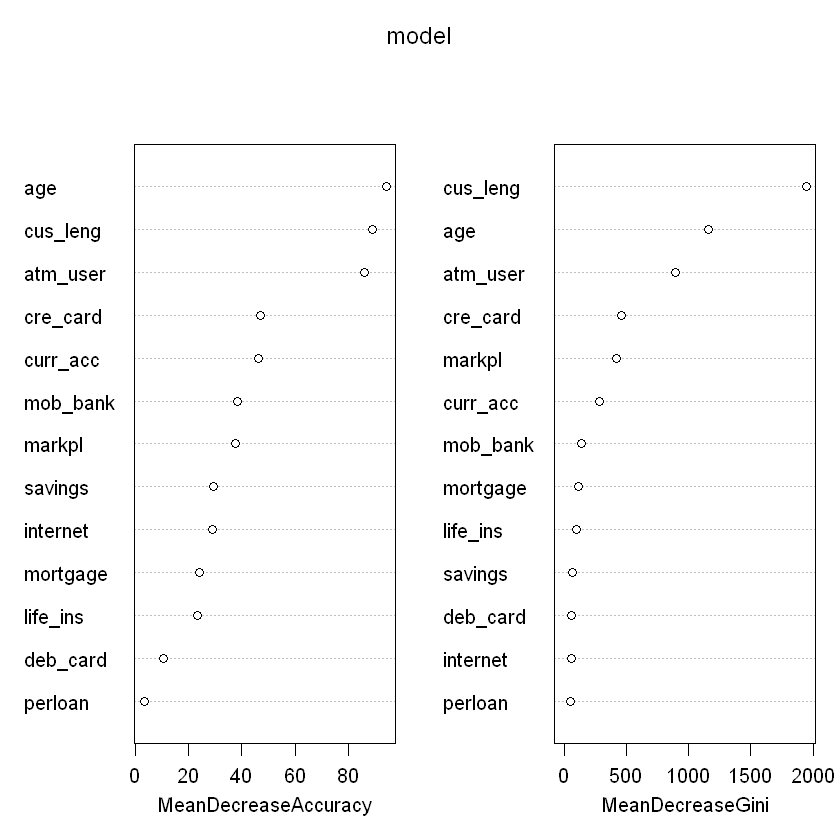

In [53]:
varImpPlot(model)

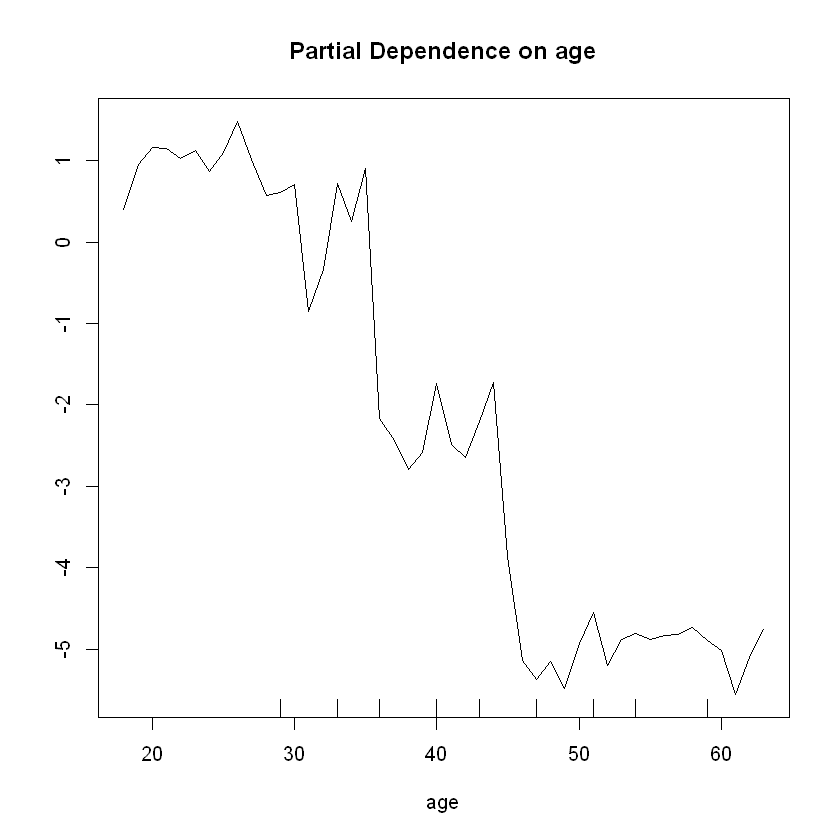

In [54]:
partialPlot(model, development, age, 1)

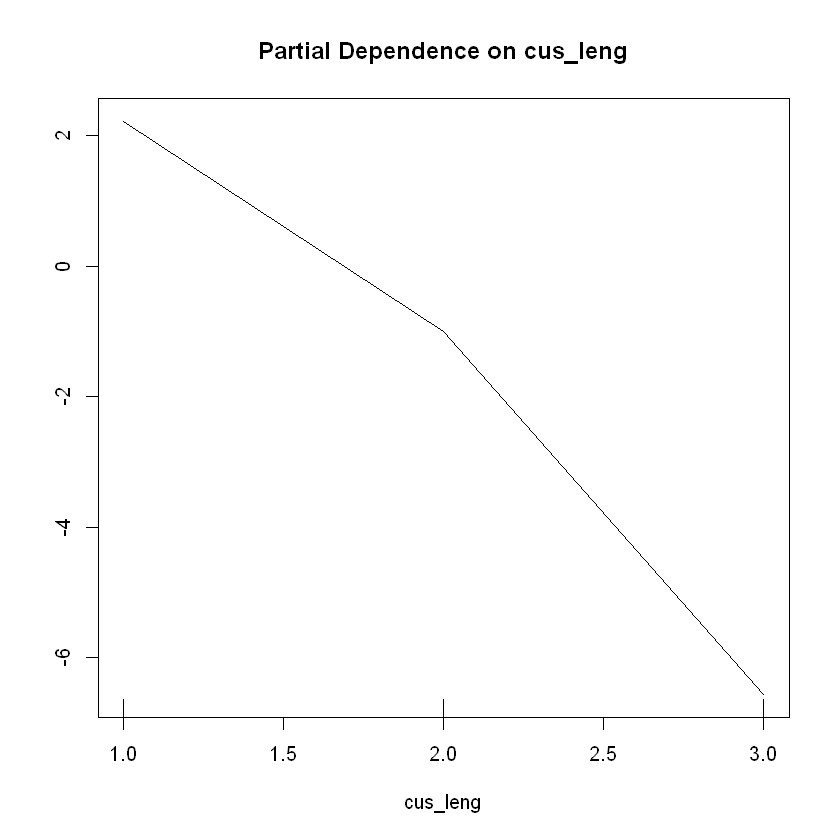

In [55]:
partialPlot(model, development, cus_leng, 1)

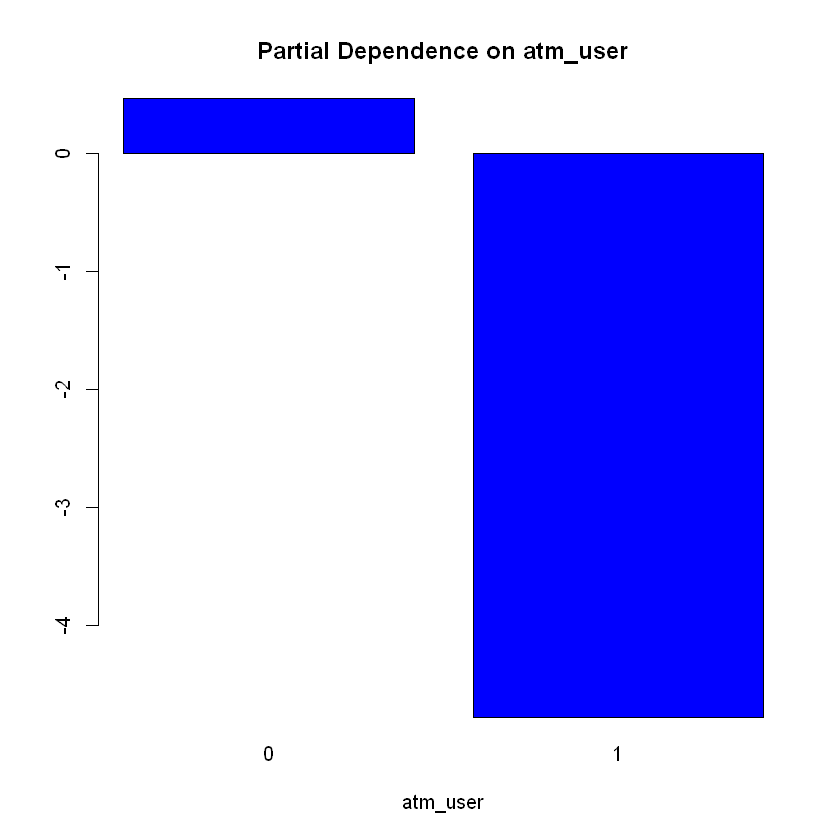

In [56]:
partialPlot(model, development, atm_user, 1)

In [57]:
prob <- predict(model, development, type="prob")
prob2 <- predict(model, holdout, type="prob")

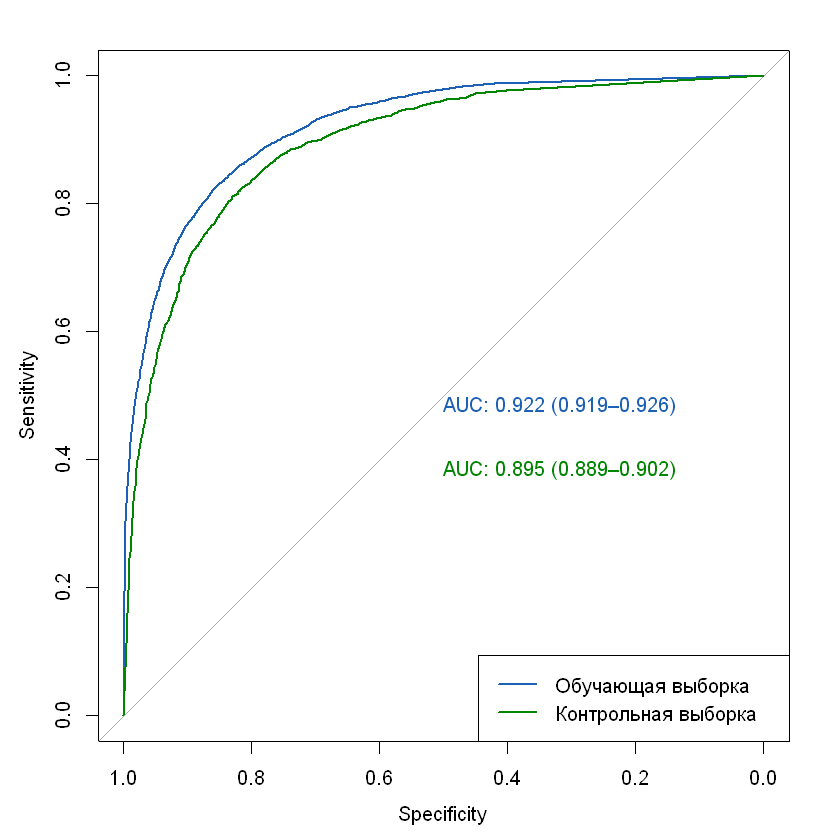

In [58]:
# загружаем пакет для построения ROC-кривых
library(pROC)
# строим ROC-кривые
roc_dev<-plot(roc(development$response, prob[,2], ci=TRUE), percent=TRUE, 
             print.auc=TRUE, col="#1c61b6")
roc_hold<-plot(roc(holdout$response, prob2[,2], ci=TRUE), percent=TRUE, 
         print.auc=TRUE, col="#008600", print.auc.y= .4, add=TRUE)
# создаем легенды к ROC-кривым
legend("bottomright", legend=c("Обучающая выборка", "Контрольная выборка"), 
       col=c("#1c61b6", "#008600"), lwd=2)